# Chapter 10: Introduction to Artificial Neural Networks with Keras

**Artificial neural networks (ANNs)**: A Machine Learning model inspired by the networks of biological neurons found in our brains.

## 10.1 From Biological to Artificial Neurons

### 10.1.1 Biological Neurons

Cell body -> Axon -> Telondendria -> Synaptic terminals (synapses) => Next cell's dendrites/body

> Note: See Figure 10-1 in book

Biological neurons produce short electrical impulses called action potentials (APs, or just signals) which travel along the axons and make the synapses release chemical signals called neurotransmitters.

When a neuron receives a sufficient amount of these neurotransmitters, it fires its own electrical impulses

### 10.1.2 Logical Computations with Neurons

Artificial neuron - It has one or more binary (on/off) inputs and one binary output. The artificial neuron activates its output when more than a certain number of its inputs are active.

> Note: See Figure 10-3 in book.

> Note: 2 input signals are needed to activate neuron C.

1. Identity function: if neuron A is activated, neuron C gets activated as well. But if neuron A is off, then neuron C is off as well.

2. Logical AND: neuron C is activated only when both neurons A and B are activated (a single input signal is not enough to activate neuron C).

3. Logical OR: neuron C gets activated if either neuron A or B is activated (or both).

4. Logicial NOT: neuron C is activated only if neuron A is active and neuron B is off.

### 10.1.3 The Perceptron

**Perceptron** - Simplest ANN architecture based on a *threshold logic unit (TLU)* or sometimes a *linear threshold unit (LTU)*. The inputs and output are numbers (instead of binary on/off values), and each input connection is associated with a weight. 

The TLU computes a weighted sum of its inputs $(z=w_1x_1 + w_2x_2 + ... + w_nx_n = \mathbf{x}^T \mathbf{w})$, then applies a **step function** to that sum and outputs the result: $h_w(\mathbf{x}) = \text{step}(z), \text{where } z=\mathbf{x}^T \mathbf{w}$.

The most common step function used in Perceptrons is the **Heaviside step function** and sometimes the sign function is used instead.

A single TLU can be used for simple linear binary classification. It computes a linear combination of the inputs and if the result exceeds a threshold, it outputs the positive class, else negative.

Hebb's rule (Hebbian learning) - "Cells that fire together, wire together." The connection weight between two neurons tends to increase when they fire simultaneously.

> Note: The decision boundary of each output neuron is linear, so Perceptrons are incapable of learning complex patterns, **unless the training instances are linearly separable** and would then converge to a solution (called the *Perceptron convergence theorem).

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [ ]:
iris = load_iris()
X = iris.data[:, (2,3)] # petal length, petal width
y = (iris.target == 0).astype(np.int) # Iris setosa?

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

> Note: Scikit-Learn's `Perceptron` is equivalent to using `SGDClassifier` with following hyperparameters: 

> - `loss="perceptron"`
> - `learning_rate="constant"`
> - `eta0=1` (the learning rate)
> - `penalty=None` (no regularization)

> Note: Perceptrons do not output a class probability; they make predictions based on a hard threshold.

### 10.1.4 The Multilayer Perceptron and Backpropagation

An MLP is composed of: 
- One (passthrough) **input layer**
- One or more layers of TLUs called **hidden layers**
- One final layer of TLUs called the **output layer**
- Every layer except output layer includes a bias neuron and is fully connected to the next layer (implicit, always true)

> Note: The signal flows only in one direction (from the inputs to the outputs), so this architecture is an example of a **feedforward neural network (FNN)**.

When an ANN contains a deep stack of hidden layers, it is called a **deep neural network (DNN)**, "10s, 100s+ layers => Deep Learning".

**Backpropagation** - It is Gradient Descent using an efficient technique for computing the gradients automatically. In other words, it can find out how each connection weight and each bias term should be tweaked in order to reduce the error. Once it has these gradients, it just performs a regular Gradient Descent step, and the whole process is repeated until the network converges to the solution.

In detail:

1. It handles one mini-batch at a time and goes through the full training set multiple times. Each pass is called an **epoch**.

2. **Forward pass**: Each mini-batch is passed to the network's input layer and into the first hidden layer. It computs the output and passed to next layer. All intermediate results are preserved.

3. Algorithm measures network's output error (ie. loss function that compares the desired output and the actual output of the network, and returns some measure of the error).

4. Computes how much each output contributed to the error. Done analytically by applying the **chain rule** from calculus.

5. Measures how much of these error contributions (**error gradient**) came from each connection in the layer below, using the chain rule, working backward until reaching the input layer.

6. Performs a Gradient Descent step to tweak all connection weights in the network, using the error gradients it just computed.

> Note: It is important to **initialize all the hidden layers' connection weights randomly**, or else training will fail.

> For example, if you initialize all weights and biases to zero, then all neurons in a given layer will be perfectly identical, and backpropagation will affect them in the exactly the same way, so they will remain identical.

> If instead you randomly initialize the weights, you **break the symmetry** and allow backpropagation to train a diverse team of neurons.

Key change is to **replace the step function with the logistic (sigmoid) function**: $ \sigma(z) = 1/ (1 + \text{exp}(-z)) $, since step function (Heaviside/sign) only has flat segments and Gradient Descent cannot move on flat segments.

Other popular choices are:
- Hyperbolic tangent function: $ \tanh (z) = 2\sigma(2z) -1 $:
    - S-shaped, continuous, differentiable
    - Output value ranges from -1 to 1
    - Tends to make each layer's output centered around 0 at beginning of training
    - Often helps speed up convergence

- Rectified Linear Unit function: $ \text{ReLU}(z) = \max(0, z) $:
    - Continuous
    - Not differentiable at $z=0$
    - Derivative is 0 for $z<0$
    - In practice, it works well and fast to compute
    - Become the default
    - Does not have a maximum output value, helps reduce issues during GD

> Note: If you chain several linear transformations, all you get is a linear transformation.

> If $f(x) = 2x + 3$ and $g(x)= 5x - 1$, then $f(g(x)) = 2(5x - 1) + 3 = 10x + 1$.

> So if you don't have some nonlinearity between layers, then even a deep stack of layers is equivalent to a single layer, and you can't solve very complex problems with that.

> Conversely, a large enough DNN with nonlinear activations can theoretically approximate any continuous function.

### 10.1.5 Regression MLPs

If you want to predict a single value (eg. price of a house), then you just need a single output neuron. 

For multivariate regression, you need one output neuron per output dimension (eg. to locate the center of an object in an image, you need to predict a 2D coordinate => 2 output neurons).

In general, when building an MLP for regression, **you do not want to use any activation function for the output neurons**, so they are free to output any range of values.

The loss function to use during training is typically the mean squared error.

### 10.1.6 Classification MLPs

For binary classification problems, you just need a single output neuron using the logistic activation function: the output will be a number between 0 and 1, which you can interpret as the estimated probability of the positive class (negative class would be $ 1 - \text{prob of positive class})$.

For multilabel binary classification problems, dedicate one output neuron for each positive class.

> Note: Output probabilities do not necessarily add up to 1. This lets the model output any combination of labels.

If each instance can belong only to a single class, then **you need to have one output neuron per class and use softmax activation function for the whole output layer** (all estimated probabilities are between 0 and 1 and add up to 1, required if classes are exclusive).

Since we are predicting probability distributions, cross-entropy loss (also called log loss) is generally a good choice for loss function.

## 10.2 Implementing MLPs with Keras

### 10.2.1 Installing TensorFlow 2

In [2]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.__version__

'2.4.1'

In [ ]:
keras.__version__

'2.4.0'

### 10.2.2 Building an Image Classifier Using the Sequential API

This chapter will be tackling the Fashion MNIST. It has the exact same format as MNIST but the images represent fashion items rather than handwritten digits.

#### Using Keras to load the dataset

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_train_full.dtype

dtype('uint8')

> Note: Every image is represented as a 28x28 array rather than a 1D array of size 784. The pixel intensities are represented as integers from 0 to 255 rather than floats from 0.0 to 255.0.

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train[0]]

'Coat'

#### Creating the model using the Sequential API

Here's a classification MLP with two hidden layers.

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Code explanation line by line:

1. Creates a `Sequential` model.
  - The simplest kind of Keras model for neural networks.
  - Composed of a single stack of layers connected sequentially.

2. Build the 1st layer and add it to the model. 
  - `Flatten` converts each input image into a 1D array.
  - If it receives input data `X` it computes `X.reshape(-1, 1)`.
  - Since it is the first layer in the model, specify the `input_shape`.

3. Add a `Dense` hidden layer with 300 neurons.
  - Uses the ReLU activation function.
  - Each `Dense` layer manages its own weight matrix, containing all the connection weights between the neurons and their inputs.
  - Manages a vector of bias terms (one per neuron).
  - When it receives input data, it computes $ h_{\mathbf{W}, \mathbf{b}}(\mathbf{X}) = \phi(\mathbf{XW} + \mathbf{b})$.

4. Add a 2nd `Dense` hidden layer with 100 neurons.
  - Uses ReLU activation function.

5. Add a `Dense` output layer with 10 neurons (one per class).
  - Uses softmax activation function (classes are exclusive).

Alternatively, we can pass a list of layers when creating the `Sequential` model.

In [ ]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(100, activation="relu"),
  keras.layers.Dense(10, activation="softmax")                           
])

In [ ]:
model.summary() # Displays all the model's layers
                # None = batch size can be anything

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_19 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


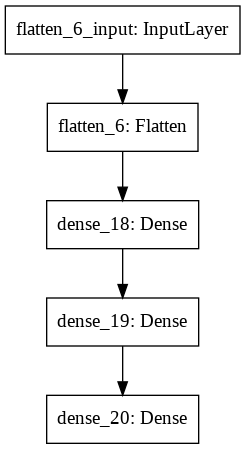

In [ ]:
keras.utils.plot_model(model) # Generates an image of your model

> Note: `Dense` layers often have a lot of parameters (235,500 for first hidden layer). This gives the model quite a lot of flexibility to fit the training data, but the model runs the risk of overfitting, especially when there isn't a lot of training data.

In [ ]:
model.layers

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense_18'

In [ ]:
model.get_layer('dense_18') is hidden1 # 'dense_18' instead of book's 'dense'

True

In [ ]:
weights, biases = hidden1.get_weights()
weights

array([[-0.02201853,  0.0059806 , -0.07226824, ..., -0.02784478,
         0.0561084 , -0.05503958],
       [-0.02628014, -0.04710997, -0.0044467 , ..., -0.04245372,
         0.04183065,  0.06866759],
       [-0.05730478, -0.00558148, -0.01771047, ..., -0.0012911 ,
         0.03570967,  0.05916241],
       ...,
       [-0.02621885,  0.02221927, -0.04146211, ..., -0.02160297,
        -0.00219274, -0.04045064],
       [-0.02129816,  0.01027724, -0.05901189, ...,  0.04627035,
        -0.04596421,  0.00605425],
       [ 0.07126527, -0.04009555,  0.00080884, ...,  0.01991408,
        -0.06352869,  0.0657769 ]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

(300,)

> Note: The `Dense` layer initialized the connection weights randomly (to break symmetry) and the biases were initialized to 0s (which is fine).

> Note: It is recommended to specify the `input_shape` when creating the first layer in a `Sequential` model. Until the model is really built, the layers will not have any weights, and you will not be able to do certain things (such as print the model summary or save the model).

#### Compiling the model

After a model is created, call `compile()` to specify the loss function, optimizer, and/or a list of extra metrics to compute.

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Code explanation:

- `loss="sparse_categorial_crossentropy"`:
  - We have sparse labels (ie. for each instance, there is just a target class index, from 0-9).
  - Classes are exclusive.

- `optimizer="sgd"`:
  - We will train the model using simple Stochastic Gradient Descent.
  - Keras will perform the backpropagation (ie. reverse-mode autodiff + Gradient Descent).
  - Note: When using the SGD optimizer, it is important to tune the learning rate. So generally use `optimizer=keras.optimizers.SGD(lr=???)` to set the learning rate, rather than `optimizer="sgd"` which defaults to `lr=0.01`.

- `metrics=["accuracy"]`:
  - It is a classifier so it's useful to measure it's "accuracy."

#### Training and evaluating the model

In [ ]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.9839 - accuracy: 0.6913 - val_loss: 0.5234 - val_accuracy: 0.8220
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4967 - accuracy: 0.8299 - val_loss: 0.4568 - val_accuracy: 0.8412
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4520 - accuracy: 0.8431 - val_loss: 0.4313 - val_accuracy: 0.8496
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4195 - accuracy: 0.8550 - val_loss: 0.4083 - val_accuracy: 0.8558
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3986 - accuracy: 0.8597 - val_loss: 0.4061 - val_accuracy: 0.8596
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3847 - accuracy: 0.8663 - val_loss: 0.3737 - val_accuracy: 0.8700
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3699 - accuracy: 0.8693 - val_loss: 0.3605 - val_accuracy:

> Note: Instead of passing a validation set using `validation_data` argument, set `validation_split` to the ratio of the training set you want Keras to use for validation.

> For example, `validation_split=0.1` tells Keras to use the last 10% of the data (before shuffling) for validation.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

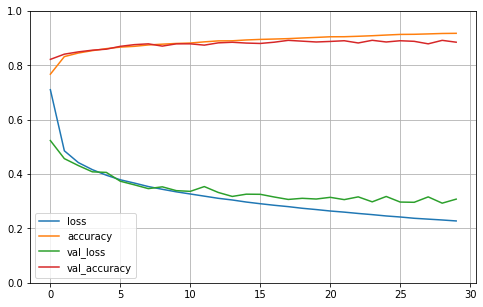

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Notes on the plot:

- Both training and validation accuracy steadily increase.
- Both traing and validation loss decrease.
- Validation curves are close to training curves => not much overfitting.
- Training curve should be shifted by half an epoch to the left (validation is recorded at end of each epoch).
- Training set performance beats validation performance (generally the case).
- Model hasn't converged yet since validation loss is still going down.
- Can continue training by calling `fit()` again and Keras continues where it left off.

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 59.2250 - accuracy: 0.8543


[59.22496795654297, 0.8543000221252441]

#### Using the model to make predictions

In [ ]:
X_new = X_test[:3] # Use first 3 instances of test set as new instances
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_pred = np.argmax(model.predict(X_new), axis=-1) # .predict_classes() is depreciated, use the following code
y_pred

array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

### 10.2.3 Building a Regression MLP Using the Sequential API

Let's tackle a regression neural network using the California housing problem.

In [6]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

Since the dataset is quite noisy, we just use a single hidden layer with fewer neurons than before, to avoid overfitting.

In [8]:
model = keras.models.Sequential([
  keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
  keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)
y_pred

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.6731 - val_loss: 0.5747
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5157 - val_loss: 0.4894
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4352 - val_loss: 0.4520
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3983 - val_loss: 0.4377
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4082 - val_loss: 0.4317
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3895 - val_loss: 0.4218
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3831 - val_loss: 0.4235
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3754 - val_loss: 0.4143
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3870 - val_loss: 0.4092
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3716 - val_loss: 0.4089

array([[1.9992337],
       [1.5287693],
       [1.7307444]], dtype=float32)

### 10.2.4 Building Complex Models Using the Functional API

One example of a nonsequential neural network is a Wide & Deep neural network. It connects all or part of the inputs directly to the output layer. This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path).

In [ ]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

Code explanation line by line:

1. Create an `Input` object.
  - The name `input_` is used to avoid overshadowing Python's built in `input()` function.
  - Specify `shape` and `dtype`.

2. Create a `Dense` layer with 30 neurons.
  - Uses ReLU activation function.
  - Call it like a function, passing it the input.
  - This is why this is called **Functional API**.
  - Tells Keras how to connect the layers together, no data is processed.

3. Create a second hidden layer.
  - Use it as a function.
  - Pass the output of the first hidden layer.

4. Create a `Concatenate` layer.
  - Use it as a function.
  - Concatenates the input and output of the second hidden layer.
  - Alternatively, `keras.layers.concatenate()` creates a `Concatenate` layer and immediately calls it with the given inputs.

5. Create the output layer.
  - Single neuron (we want a single value).
  - No activation function (we want the value to be any range, no constraints).
  - Call it like a function, passing the result of concatenation.

6. Create a Keras `Model`.
  - Specify inputs and outputs to use.

What if you want to send a subset of the features through the wide path and a different subset (possibly overlapping) through the deep path?

One solution is to use multiple inputs.

In [ ]:
input_A = keras.layers.Input(shape=[5], name="wide_input") # 5 features through wide path (features 0-4)
input_B = keras.layers.Input(shape=[6], name="deep_input") # 6 features through deep path (features 2-7)
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

Because we specified, `inputs=[input_A, input_B]`, we must pass a pair of matrices `(X_train_A, X_train_B)`: one per input - same for `X_valid`, `X_test`, `X_new` when calling `evaluate()` or `predict()`.

> Note: Alternatively, you can pass a dictionary mapping the input names to the input values like `{"wide_input": X_train_A, "deep_input": X_train_B}`. This is especially useful when there are many inputs, to avoid getting the order wrong.

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))
y_pred

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.8056 - val_loss: 0.8478
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7225 - val_loss: 0.6446
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6182 - val_loss: 0.5956
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5733 - val_loss: 0.5670
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5726 - val_loss: 0.5452
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5384 - val_loss: 0.5304
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5222 - val_loss: 0.5174
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5121 - val_loss: 0.5060
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5049 - val_loss: 0.4973
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5065 - val_loss: 0.4922

array([[3.636394 ],
       [3.2428286],
       [3.1800995]], dtype=float32)

Cases to have multiple outputs:

- Task may demand it.
  - For example, locate and classify the main object in a picture.
  - This is both a regression and classification task.

- Multiple independent tasks based on the same data.
  - Neural networks can learn features in the data that are useful across tasks.
  - For example, multitask classification on pictures of faces.
  - 1 output to classify the person's facial expression (smiling, surprised, etc.)
  - 1 output to identify whether they are wearing glasses or not.

- Regularization technique (ie. a training constraint whose objective is to reduce overfitting and improve the model's ability to generalize).
  - For example, add auxiliary outputs to ensure that the underlying part of the network learns something useful on its own, without relying on the rest of the network.

The following code builds the network represented in Figure 10-16 - Aux. Output that branches out from Hidden 2 layer.

In [ ]:
input_A = keras.layers.Input(shape=[5], name="wide_input") # 5 features through wide path (features 0-4)
input_B = keras.layers.Input(shape=[6], name="deep_input") # 6 features through deep path (features 2-7)
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
# Same as above, up to the main output layer
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

Each output will need its own loss function.

We care much more about the main output than about the auxiliary output (just used for regularization), so we want to give the main output's loss a much greater weight.

In [ ]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20, # Main & Auxiliary output same predictions => same labels
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

y_pred_main, y_pred_aux

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.6885 - main_output_loss: 1.6079 - aux_output_loss: 2.4138 - val_loss: 1.2296 - val_main_output_loss: 1.2167 - val_aux_output_loss: 1.3458
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7378 - main_output_loss: 0.6827 - aux_output_loss: 1.2329 - val_loss: 0.6301 - val_main_output_loss: 0.5818 - val_aux_output_loss: 1.0641
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5698 - main_output_loss: 0.5182 - aux_output_loss: 1.0337 - val_loss: 0.4929 - val_main_output_loss: 0.4533 - val_aux_output_loss: 0.8494
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4810 - main_output_loss: 0.4413 - aux_output_loss: 0.8387 - val_loss: 0.4661 - val_main_output_loss: 0.4347 - val_aux_output_loss: 0.7485
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4682 - main_output_loss: 0.4382 - aux_output_loss: 0.7383 - val_loss

(array([[3.6975222],
        [3.1889672],
        [3.41285  ]], dtype=float32), array([[3.4704459],
        [3.1441848],
        [3.3152936]], dtype=float32))

### 10.2.5 Using the Subclassing API to Build Dynamic Models

Sequential and Functional API are declarative: you start by declaring which layers you want to use and how they should be connected, and only then can you start feeding the model some data for training.

Advantages:
- Easily saved, cloned, and shared
- Structure can be displayed and analyzed
- Framework can infer shapes and check types
- Errors can be caught early (ie. before any data ever goes through model)
- Easy to debug (static graph of layers)

Disadvantages:
- Static
- Cannot support models involving loops, varying shapes, conditional branching, other dynamic behaviors

Subclassing API is a more imperative programming style.
1. Subclass the `Model` class
2. Create the layers you need in the constructor
3. Use `call()` to perform the computations
4. Then compile, evaluate, make predictions, exactly like before

For example, the following `WideAndDeepModel` class gives us an equivalent model to the one built with the Functional API.

In [ ]:
class WideAndDeepModel(keras.Model):
  def __init__(self, units=30, activation="relu", **kwargs):
    super().__init__(**kwargs) # handles standard args (eg. name)
    self.hidden1 = keras.layers.Dense(units, activation=activation)
    self.hidden2 = keras.layers.Dense(units, activation=activation)
    self.main_output = keras.layers.Dense(1)
    self.aux_output = keras.layers.Dense(1)

  def call(self, inputs):
    input_A, input_B = inputs
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)
    concat = keras.layers.concatenate([input_A, hidden2])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
    return main_output, aux_output

model = WideAndDeepModel()

We do not need to create the inputs; we just use the `input` argument to the `call()` method and we separate the creation of the layers in the constructor from their usage in the `call()` method.

Advantages:
- You can do pretty much anything in the `call()` method:
  - `for` loops
  - `if` statements
  - Low-level Tensorflow operations

Disadvantages:
- Model's architecture is hidden within the `call()` method, so Keras cannot easily inspect it.
  - Cannot save or clone it
  - When calling `summary()`, you only get a list of layers, without any information on their connections
  - Keras cannot check types and shapes ahead of time
  - Easier to make mistakes

> Note: So unless you really need that extra flexibility, you should probably stick to the Sequential or Functional API.

### 10.2.6 Saving and Restoring a Model

In [ ]:
# FROM TEXTBOOK NOTEBOOK

model = keras.models.Sequential([ # or keras.Model([...])
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.7403 - val_loss: 0.8034
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7512 - val_loss: 0.6752
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6632 - val_loss: 0.6161
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6276 - val_loss: 0.5735
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5862 - val_loss: 0.5398
Epoch 6/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5410 - val_loss: 0.5127
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5239 - val_loss: 0.4924
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4789 - val_loss: 0.4772
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5009 - val_loss: 0.4668
Epoch 10/10
162/162 [==============================] - 0s 976us/step - loss: 0.5059


In [ ]:
model.save("my_keras_model.h5")

Keras uses the HDF5 format to save:
- The model's architecture (every layer's hyperparmeters)
- The values of all the model parameters for every layer (eg. connection weights and biases)
- The optimizer and its hyperparameters and any state it may have

In [ ]:
model = keras.models.load_model("my_keras_model.h5")

> Note: This will work when using the Sequential or Functional API, but not when using model subclassing.

### 10.2.7 Using Callbacks

The `fit()` method accepts a `callbacks` argument that lets you specify a list of objects that Keras will call at the start and end of training, at the start and end of each epoch, and even before and after processing each batch.

`ModelCheckpoint` callback saves checkpoints of your model at regular intervals during training (default at the end of each epoch).

In [ ]:
# FROM TEXTBOOK NOTEBOOK

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 3.3255
Epoch 2/10
363/363 [==============================] - 0s 960us/step - loss: 1.0364
Epoch 3/10
363/363 [==============================] - 0s 945us/step - loss: 0.7435
Epoch 4/10
363/363 [==============================] - 0s 941us/step - loss: 0.6265
Epoch 5/10
363/363 [==============================] - 0s 988us/step - loss: 0.5925
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5530
Epoch 7/10
363/363 [==============================] - 0s 944us/step - loss: 0.5165
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5047
Epoch 9/10
363/363 [==============================] - 0s 997us/step - loss: 0.5046
Epoch 10/10
363/363 [==============================] - 0s 948us/step - loss: 0.4778


In [ ]:
# Early stopping

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
                                                save_best_only=True) # Only save when its performance on valid set is best so far
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # roll back to best model

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4792 - val_loss: 0.4649
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4704 - val_loss: 0.4570
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4628 - val_loss: 0.4500
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4555 - val_loss: 0.4444
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4493 - val_loss: 0.4397
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4440 - val_loss: 0.4349
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4390 - val_loss: 0.4302
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4343 - val_loss: 0.4269
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4299 - val_loss: 0.4240
Epoch 10/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4259 - val_loss: 0.4206

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,                # No progress on valid set for patience number of epochs
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4223 - val_loss: 0.4171
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4184 - val_loss: 0.4142
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4153 - val_loss: 0.4123
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4124 - val_loss: 0.4095
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4094 - val_loss: 0.4072
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4064 - val_loss: 0.4047
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4036 - val_loss: 0.4032
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4012 - val_loss: 0.4012
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3985 - val_loss: 0.3988
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3963 - val_lo

Can write custom callbacks.

For example, this will display the ratio between the validation and training loss during training (eg. to detect overfitting).

In [ ]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

### 10.2.8 Using TensorBoard for Visualization

TensorBoard is a great interactive visualization tool that you can use to:
- View the learning curves during training
- Compare learning curves between multiple runs
- Visualize the computation graph
- Analyze training statistics
- View images generated by your model
- Visualize complex multidimensional data projected down to 3D and automatically clustered for you

To use it, you must modify your program so that it outputs the data you want to visualize to special binary log files called event files. In general, you want to point the TensorBoard server to a root log directory and configure you program so that it writes to a different subdirectory every time it runs.

In [ ]:
import os

In [ ]:
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir() # eg. './my_logs/run_2019_06_07-15_15_22'

In [ ]:
# FROM TEXTBOOK NOTEBOOK

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [ ]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 3.7293 - val_loss: 1.1000
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.9233 - val_loss: 0.7208
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6920 - val_loss: 0.6516
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6287 - val_loss: 0.6212
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6107 - val_loss: 0.5999
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6001 - val_loss: 0.5803
Epoch 7/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5703 - val_loss: 0.5631
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5568 - val_loss: 0.5481
Epoch 9/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5369 - val_loss: 0.5335
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5241 - val_loss: 0.5203

In [ ]:
run_logdir2 = get_run_logdir()

In [ ]:
# FROM TEXTBOOK NOTEBOOK

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))

In [ ]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.8424 - val_loss: 1.0077
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4451 - val_loss: 0.4464
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3933 - val_loss: 0.3772
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3748 - val_loss: 0.3565
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3534 - val_loss: 0.3760
Epoch 6/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3562 - val_loss: 0.3492
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3296 - val_loss: 0.4262
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3424 - val_loss: 0.3208
Epoch 9/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3320 - val_loss: 0.3390
Epoch 10/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3251 - val_loss: 0.3279

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

The following code creates a `SummaryWriter` using the `create_file_writer()` function, and it uses this writer as a context to log scalars, histograms, images, audio, and text, all of which can then be visualized using TensorBoard.

In [ ]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100 # some random data
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.randn(2, 32, 32, 3) # random 32x32 RGB images
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate = 48000, step=step)

## 10.3 Fine-Tuning Neural Networks Hyperparameters

The flexibility of neural networks is also one of their main drawbacks: there are many hyperparameters to tweak. One option is to simply try many combinations of hyperparameters and see which one works best on the validation set (eg. use `GridSearchCV` or `RandomizedSearchCV`).

But first, we need to wrap our Keras models in objects that mimic regular Scikit-Learn regressors.

In [4]:
# Create a function that will build and compile a Keras model
# Given a set of hyperparameters

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))         # Input layer
    for layer in range(n_hidden):                                       # Hidden layers
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))                                    # Output layer
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [5]:
# Next create a KerasRegressor model
# Based on this build_model() function

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

The `KerasRegressor` object is a thin wrapper around the Keras model built using `build_model()`. Now we can use this object like a regular Scikit-Learn regressor:
- Train using `fit()`
- Evaluate using `score()`
- Make predictions using `predict()`

In [9]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 2.2255 - val_loss: 0.7189
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6816 - val_loss: 0.6470
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6098 - val_loss: 0.5912
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5365 - val_loss: 0.5616
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5231 - val_loss: 0.5397
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4820 - val_loss: 0.5245
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4877 - val_loss: 0.5108
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4939 - val_loss: 0.5021
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4698 - val_loss: 0.4937
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4732 - val_lo

We don't want to train and evaluate just a single model; we want to train hundreds of variants and see which one performs best on validation set. Since there are many hyperparameters, it's preferable to use a randomized search rather than grid search.

In [10]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [35]:
# Note: There's current a bug with Keras/Sklearn's "KerasRegressor"
# Workaround: all param values have to be lists

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100).tolist(),
    "learning_rate": np.array(reciprocal.rvs(3e-4, 3e-2, size=10)).tolist()         # Extract 10 values out of PDF
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100, verbose=0,                          # Suppressed epoch output printing
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])                


121/121 [==============================] - 0s 707us/step - loss: 0.4022


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7ff336d22850>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': [0.006668687734339515,
                                                          0.0012262191828130119,
                                                          0.0011155759815355039,
                                                          0.009630728205057507,
                                                          0.00030257500252921563,
                                                          0.0009422646877394766,
                                                          0.0031135269814296946,
                                                          0.0025815956673095487,
                                                          0.0016687473230493465,
                                                   

> Note: `RandomizedSearchCV` uses K-fold cross-validation so it does not use `X_valid` and `y_valid`, which are only used for early stopping.

In [36]:
rnd_search_cv.best_params_

{'learning_rate': 0.009630728205057507, 'n_hidden': 3, 'n_neurons': 31}

In [37]:
rnd_search_cv.best_score_

-0.31591692566871643

In [38]:
model = rnd_search_cv.best_estimator_.model
model

There are many techniques that explore a search space much more efficiently than randomly. Their core idea is simple: when a region of the space turns out to be good, it should be explored more.

### 10.3.1 Number of Hidden Layers

For many problems, you can begin with a single hidden layer and get reasonable results.

But for complex problems, deep networks have a much higher parameter efficiency than shallow ones: they can model complex functions using exponentially fewer neurons than shallow nets, allowing them to reach much better performance with the same amount of training data.  
=> more layers, less neurons

Example: imagine drawing a forest.

It would take a very long time if you have to draw every tree individually, with every branch and every leaf.

But if you can draw 1 leaf, copy & paste -> draw 1 branch, copy & paste -> draw 1 tree, copy & paste, you'll be done in no time.

Neural networks take advantage of this structure:
- Lower hidden layers model low-level structures (eg. line segments)
- Intermediate hidden layers combine low-level structures to model intermediate-level structures (eg. squares, circles)
- Highest hidden layers and outout layer combine these intermediate structures to model high-level structures (eg. faces)

**Transfer learning** - Initialize the weights and biases of the first few layers from second network to the ones of the first network. The network will not have to learn from scratch all the low-level structures, only the higher-level ones.

**Summary**:
***
- You can start with just 1 or 2 hidden layers and the neural network will work just fine.
- For more complex problems, you can ramp up the number of hidden layers until you start overfitting the training set.

### 10.3.2 Number of Neurons per Hidden Layer

The number of neurons in the input and output layers is determined by the type of input and output your task requires.

For example, the MNIST task requires 28 x 28 = 784 input neurons and 10 output neurons.

For hidden layers, pick the same number of neurons for all layers, as it performs just as well or even better than pyramid (most at low-level, least at high-level) and there is only 1 hyperparameter to tune.

For best practice, pick a model with more layers and neurons than you actually need, then use early stopping and other regularization techniques to prevent it from overfitting.

> The "stretch pants" approch: instead of wasting time looking for pants that perfectly match your size, just use large stretch pants that will shrink down to the right size.

> Note: In general you will get more bang for your buck by increasing the number of layers instead of number of neurons per layer.

### 10.3.3 Learning Rate, Batch Size, and Other Hyperparameters

**Learning rate**:
- In general, the optimal learning rate is about half the maximum learning rate (ie, the learning rate above which the algorithm diverges).
- Train the model for a few hundred iterations, starting with a very low learning rate (eg. $10^{-5}$) and gradually increasing to a very large value (eg. $10$).
- Plot the loss as a function of the learning rate (using a log scale for the learning rate).
- You should see it dropping at first then shoot back up (learning rate too large).
- Optimal learning rate will be a bit lower than that point.
- Then reinitialize the model and train normally using this good learning rate.

**Optimizer**:
- Choosing a better optimizer than Mini-batch Gradient Descent is quite important.

**Batch size**:
- One strategy is to try to use a large batch size, using learning rate warmup.
- If the training is unstable or the final performance is disappointing, then try using a small batch size instead.

**Activation function**:
- ReLU activation function will be a good default for all hidden layers.
- For output layer, depends on the task.

**Number of iterations**:
- In most cases, the number of training iterations do not need to be tweaked.
- Use early stopping instead.